In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import os
import IPython.display as ipd
import matplotlib.pyplot as plt

In [24]:
# DATASET = https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
# DATA PROCESSING
DATASET_PATH = "/home/gmallet/datasets/gtzan"
ROI_PATH = DATASET_PATH + "/genres_original/"

def get_files(root_path, extension):
    files_paths = []
    for root, _, files in os.walk(root_path, topdown=True):
        files_paths += [os.path.join(root, file) for file in files if file.endswith(extension)]
    return files_paths

def load_song(song_path):
    return song_path, librosa.load(song_path)


def load_random_song(files_path, music_type = ""):
    files_paths = get_files(os.path.join(files_path, music_type), "wav")
    file_path = random.choice(files_paths)
    return load_song(file_path)

song_path, (song, sr) = load_random_song(ROI_PATH)

In [3]:
song_path

'/home/gmallet/datasets/gtzan/genres_original/rock/rock.00096.wav'

In [4]:
ipd.Audio(song_path)

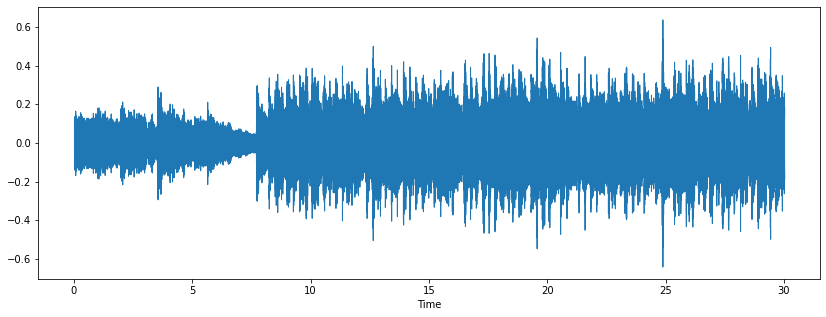

In [5]:
# WAVEFORM
plt.figure(figsize=(14, 5))
librosa.display.waveshow(song, sr=sr)

# WHY WAVES FEELS LIKE THEY ARE SYMETRIC?

# FIRST OF ALL, DON'T FORGET THIS IS A FUNCTION OF A SINGLE LINE, ITS NOT 2 FUNCTION BEING SYMETRIC TO x AXIS.
# A SONG IS PRODUCED BY SOMETHING MAKING COMPRESSION AND DECOMPRESSION OF THE AIR.
# THAT SAID, IF YOU ONLY COMPRESS AIR, YOUR NOT MAKING SOUND, YOU'RE JUST.. COMPRESSING AIR.
# A MATH VIEW OF THIS IS THAT THE INTEGRALE WILL REMAIN TO 0.

# SO, NOT SYMETRIC, BUT INTEGRALE = 0

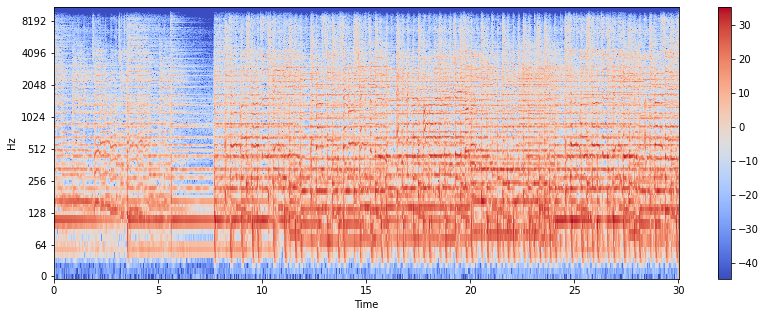

In [6]:
# SPECTROGRAM
# SHORT FOURIER TRANSFORM
# DIVISE A SONG IN X SAMPLE, APPLY FOURIER TRANSFORM ON EACH
X = librosa.stft(song)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# THE MORE DATA IS VISUAL, THE MORE YOU CAN FEED IT INTO A CNN

In [7]:
def show_mfcc(song, sr):
    mfcc = librosa.feature.mfcc(y=song, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')

In [32]:
c_path, (c_song, c_sr) = load_song('/home/gmallet/datasets/gtzan/genres_original/classical/classical.00012.wav')
c_2path, (c_2song, c_2sr) = load_song('/home/gmallet/datasets/gtzan/genres_original/classical/classical.00055.wav')
r_path, (r_song, r_sr) = load_song('/home/gmallet/datasets/gtzan/genres_original/rock/rock.00002.wav')
r_2path, (r_2song, r_2sr) = load_song('/home/gmallet/datasets/gtzan/genres_original/rock/rock.00073.wav')

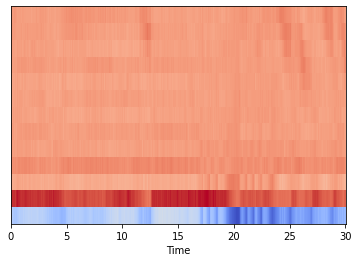

In [33]:
show_mfcc(c_song, c_sr)

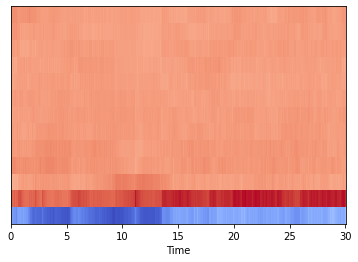

In [31]:
show_mfcc(c_2song, c_2sr)

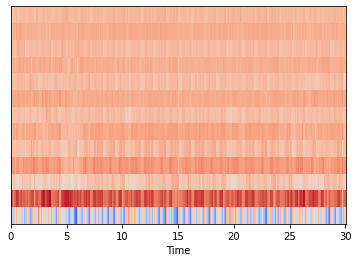

In [27]:
show_mfcc(r_song, r_sr)

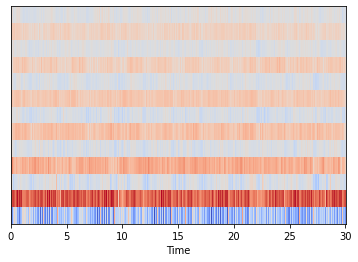

In [28]:
show_mfcc(r_2song, r_2sr)